## Portfolio 1

### Building a simple image search algorithm

*By Sofie Mosegaard, 01-03-2024*

For this assignment, you'll be using ```OpenCV``` to design a simple image search algorithm.

For this exercise, you should write some code which does the following:

- Define a particular image that you want to work with
- For that image
  - Extract the colour histogram using ```OpenCV```
- Extract colour histograms for all of the **other* images in the data
- Compare the histogram of our chosen image to all of the other histograms 
  - For this, use the ```cv2.compareHist()``` function with the ```cv2.HISTCMP_CHISQR``` metric
- Find the five images which are most simlar to the target image
  - Save a CSV file to the folder called ```out```, showing the five most similar images and the distance metric:


### Import libraries

In [ ]:
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib

In [1]:
import os
import glob
import sys
sys.path.append("..")

# Image processing and numerical tools
import cv2 # openCV
import numpy as np

# class utils functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

### Step 1: load one image and extract the color histogram

In [20]:
# First, load in one particular flower image from the dataset "flowers"

filepath_f1 = os.path.join("..",
                                "..",
                                "..",
                                "..",
                                "cds-vis-data",
                                "flowers", 
                                "image_0001.jpg")

image_f1 = cv2.imread(filepath_f1)

<function matplotlib.pyplot.show(close=None, block=None)>

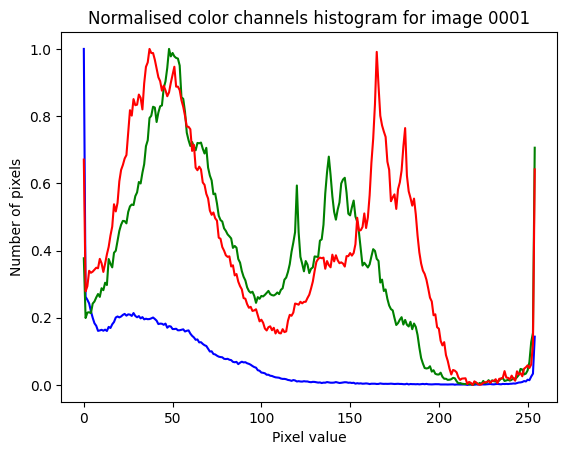

In [24]:
# Split the image into the three color channels
channels_f1 = cv2.split(image_f1)

# Create color tuple
colors = ("blue", "green", "red")

# Create the color channel histogram for the given image
plt.figure()

plt.title("Normalised color channels histogram for image 0001")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

# Initialise counter variable
i = 0

for channel_f1 in channels_f1:
    # Create histogram of values for single channel
    hist_f1 = cv2.calcHist([channel_f1], [0], None,  [255], [0, 256])
    # MinMax normalisation of the histogram
    norm_hist_f1 = cv2.normalize(hist_f1, hist_f1, 0, 1.0, cv2.NORM_MINMAX)
    # Get plot color
    line_color = colors[i]
    # Plot histogram
    plt.plot(norm_hist_f1, color = line_color)
    # Update counter, so the color will change according to the specific channel, that we loop over
    i += 1

plt.show

### Step 2: Extract colour histograms for all of the other images

In [25]:
filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "flowers", 
                        "*.*")

In [ ]:
# Initialize a pandas dataframe with specified column names
distance_df = pd.DataFrame(columns=("Filename","Distance"))

for file in sorted(os.listdir(filepath)): # Loop through all images in the sorted order
    if file != filepath_f1: # As I dont want to include flower image 1 once again
        
        image = cv2.imread(file)
        
        image_name = file.split("/")[-1]

        # Extract color hist
        hist = cv2.calcHist([image], [0,1,2], None, [255, 255, 255],  [0,256, 0,256, 0,256])

        # Normalise hist
        norm_hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)

        # Compare the hist of flower image 1 and the new image 
        dist = round(cv2.compareHist(norm_hist_f1, norm_hist, cv2.HISTCMP_CHISQR), 3)

        if len(distance_df.index) < 5: 
        """
        When the table consitsts of five images, I want to compare the distance and remove the one,
        with the biggest distance difference

        """




        # Append the image name and distance of the five most similar images to the distance_df
        text_row = [image_name, ]

        distance_df.loc[len(distance_df)] = text_row
            
    # Specify path to the output folder and name of the specific .csv file
    csv_outpath = os.path.join("..", "out", "table.csv")

distance_df.to_csv(csv_outpath)  
